In [1]:
from builtins import type

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Datasets/Data_Combinada.v2')
df.head()

,Unnamed: 0,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
0,0,2,90,13.0,0,0,0,0.0,0.0,0,32.0,1,1,39.5,2
1,1,2,90,13.0,0,0,1,0.0,0.0,0,47.0,1,1,39.5,2
2,2,2,30,3.0,1,1,1,1.0,0.0,0,32.0,1,1,37.0,3
3,4,2,30,3.0,1,0,1,0.0,0.0,0,42.0,1,1,37.0,3
4,5,1,110,1.0,2,2,1,0.0,0.0,0,19.0,1,1,19.0,2


# Porcentaje de accidentes con alcohol y sin alcohol

In [3]:
# Analizando la relación entre accidentes con y sin alcohol, y con y sin drogas
# Contando los casos

# Accidentes con y sin alcohol
accidentes_con_alcohol = df[df['positiva_alcohol'] == 1].shape[0]
accidentes_sin_alcohol = df[df['positiva_alcohol'] == 0].shape[0]

# Accidentes con y sin drogas
accidentes_con_drogas = df[df['positiva_droga'] == 1].shape[0]
accidentes_sin_drogas = df[df['positiva_droga'] == 0].shape[0]

(accidentes_con_alcohol, accidentes_sin_alcohol, accidentes_con_drogas, accidentes_sin_drogas)


(2338, 58155, 268, 60225)

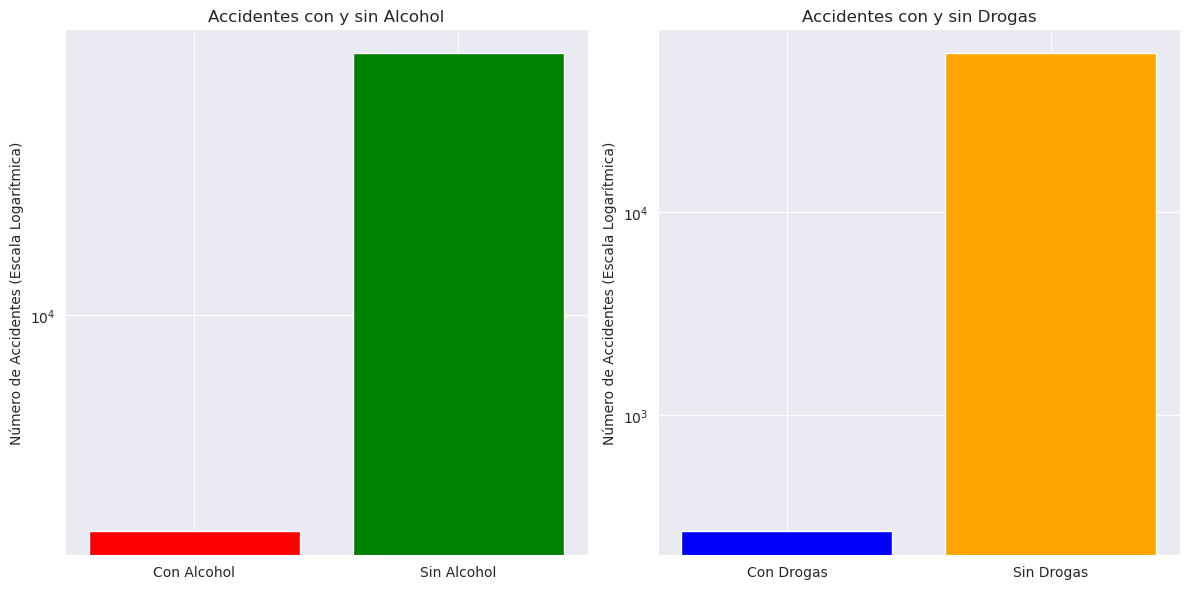

In [4]:
import matplotlib.pyplot as plt

# Preparando los datos para las gráficas
categorias_alcohol = ['Con Alcohol', 'Sin Alcohol']
valores_alcohol = [accidentes_con_alcohol, accidentes_sin_alcohol]

categorias_drogas = ['Con Drogas', 'Sin Drogas']
valores_drogas = [accidentes_con_drogas, accidentes_sin_drogas]

# Creando las gráficas con escala logarítmica
plt.figure(figsize=(12, 6))

# Gráfica para alcohol
plt.subplot(1, 2, 1)
plt.bar(categorias_alcohol, valores_alcohol, color=['red', 'green'])
plt.yscale('log')
plt.title('Accidentes con y sin Alcohol')
plt.ylabel('Número de Accidentes (Escala Logarítmica)')

# Gráfica para drogas
plt.subplot(1, 2, 2)
plt.bar(categorias_drogas, valores_drogas, color=['blue', 'orange'])
plt.yscale('log')
plt.title('Accidentes con y sin Drogas')
plt.ylabel('Número de Accidentes (Escala Logarítmica)')

# Mostrando las gráficas
plt.tight_layout()
plt.show()


Cargamos datacombinada viejo para deshacer los cambios en el código de tipo de vehículo

In [5]:
df_legacy = pd.read_csv('Datasets/Data_Combinada.csv', low_memory=False)
unique_values = df_legacy['tipo_vehiculo'].unique()
dictionary = {code: type_of for code, type_of in enumerate(unique_values)}

df['tipo_vehiculo'] = df['tipo_vehiculo'].map(dictionary)

In [6]:
dictionary

{0: 'Turismo',
 1: 'Motocicleta hasta 125cc',
 2: 'Motocicleta > 125cc',
 3: 'Furgoneta',
 4: 'Camión rígido',
 5: 'Todo terreno',
 6: 'Bicicleta EPAC (pedaleo asistido)',
 7: 'VMU eléctrico',
 8: 'Maquinaria de obras',
 9: 'Ciclomotor',
 10: 'Autobús articulado',
 11: 'Vehículo articulado',
 12: nan,
 13: 'Otros vehículos con motor',
 14: 'Autocaravana',
 15: 'Autobús',
 16: 'Tractocamión',
 17: 'Bicicleta',
 18: 'Cuadriciclo ligero',
 19: 'Sin especificar',
 20: 'Autobús articulado EMT',
 21: 'Autobus EMT',
 22: 'Cuadriciclo no ligero',
 23: 'Camión de bomberos',
 24: 'Ambulancia SAMUR',
 25: 'Ciclo',
 26: 'Moto de tres ruedas > 125cc',
 27: 'Ciclomotor de dos ruedas L1e-B',
 28: 'Moto de tres ruedas hasta 125cc',
 29: 'Semiremolque',
 30: 'Patinete no eléctrico',
 31: 'Remolque',
 32: 'Otros vehículos sin motor',
 33: 'Microbús <= 17 plazas',
 34: 'Tren/metro'}

In [7]:
df.head()

,Unnamed: 0,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
0,0,2,90,13.0,0,Turismo,0,0.0,0.0,0,32.0,1,1,39.5,2
1,1,2,90,13.0,0,Turismo,1,0.0,0.0,0,47.0,1,1,39.5,2
2,2,2,30,3.0,1,Motocicleta hasta 125cc,1,1.0,0.0,0,32.0,1,1,37.0,3
3,4,2,30,3.0,1,Turismo,1,0.0,0.0,0,42.0,1,1,37.0,3
4,5,1,110,1.0,2,Motocicleta > 125cc,1,0.0,0.0,0,19.0,1,1,19.0,2


In [8]:
accidentes_por_tipo_vehiculo = df['tipo_vehiculo'].value_counts()

df_accidentes_por_tipo_vehiculo = accidentes_por_tipo_vehiculo.reset_index()
df_accidentes_por_tipo_vehiculo.columns = ['Tipo de Vehículo', 'Número de Accidentes']

df_accidentes_por_tipo_vehiculo.sort_values(by='Número de Accidentes', inplace=True, ascending=False)

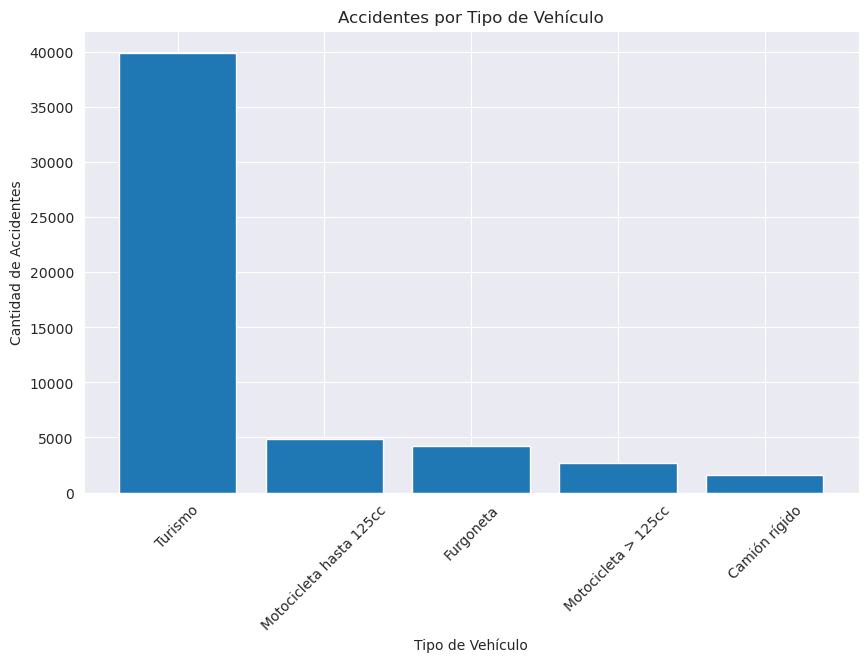

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'].head(),
        df_accidentes_por_tipo_vehiculo['Número de Accidentes'].head())
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Tipo de Vehículo')
plt.xticks(rotation=45)
plt.show()

Por desgracia la DGT solo presentó los datos de los tipos de vehículos en un pdf y no en un csv, así que se introducirán a mano
Años Camiones y furgonetas Autobuses    Turismos Motocicletas Tractores industriales Otros vehículos * Total
2021        168.824         2.092       953.624     173.435     17.345               10.373            1.325.693

In [10]:
type_vehicles = {'Autobuses': 2092,
                 'Camiones y furgonetas': 168824,
                 'Turismos': 953624,
                 'Motocicletas': 173435,
                 'Tractores': 17345,
                 'Otros': 10373}
total_vehicles = 1325693

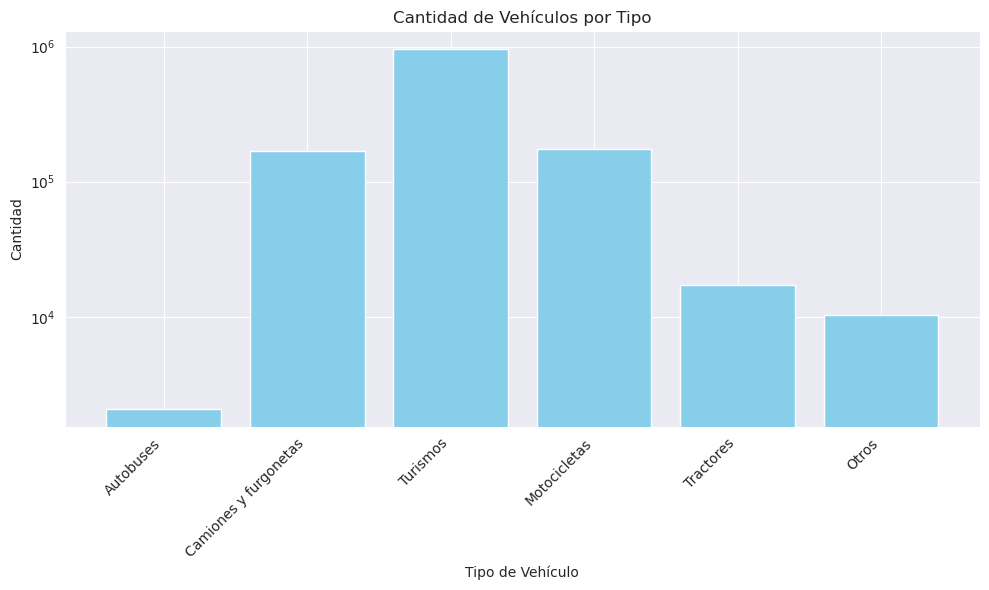

In [11]:
category = list(type_vehicles.keys())
valores = list(type_vehicles.values())

plt.figure(figsize=(10, 6))
plt.bar(category, valores, color='skyblue')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad')
plt.yscale('log')
plt.title('Cantidad de Vehículos por Tipo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [36]:
df_accidentes_por_tipo_vehiculo['Tipo de Vehículo']

0                               Turismo
1               Motocicleta hasta 125cc
2                             Furgoneta
3                   Motocicleta > 125cc
4                         Camión rígido
5                               Autobús
6                             Bicicleta
7                         VMU eléctrico
8                            Ciclomotor
9                          Todo terreno
10                         Tractocamión
11    Bicicleta EPAC (pedaleo asistido)
12                  Maquinaria de obras
13            Otros vehículos con motor
14                  Vehículo articulado
15                      Sin especificar
16                   Autobús articulado
17                          Autobus EMT
18                   Cuadriciclo ligero
19                                Ciclo
20                Cuadriciclo no ligero
21                         Autocaravana
22                     Ambulancia SAMUR
23          Moto de tres ruedas > 125cc
24                Patinete no eléctrico


In [56]:
# Ratio calculation for 'Furgoneta' and 'Camión rígido'
df_accidentes_por_tipo_vehiculo['Ratio'] = np.where(
    (df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'] == 'Furgoneta') |
    (df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'] == 'Camión rígido'),
    df_accidentes_por_tipo_vehiculo['Número de Accidentes'] / type_vehicles['Camiones y furgonetas'],
    0
)# TODO fix this as this has to take into account the sum, not only some of them

# Adding Ratio for 'Turismo'
df_accidentes_por_tipo_vehiculo['Ratio'] += np.where(
    df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'] == 'Turismo',
    df_accidentes_por_tipo_vehiculo['Número de Accidentes'] / type_vehicles['Turismos'],
    0
)

df_accidentes_por_tipo_vehiculo['Ratio'] += np.where(
    (df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'] == 'Autobús'),
    df_accidentes_por_tipo_vehiculo['Número de Accidentes'] / type_vehicles['Autobuses'],
    0
)

df_accidentes_por_tipo_vehiculo['Ratio'] += np.where(
    (df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'] == 'Motocicleta > 125cc') |
    (df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'] == 'Moto de tres ruedas > 125cc') |
    (df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'] == 'Motocicleta hasta 125cc'),
    df_accidentes_por_tipo_vehiculo['Número de Accidentes'] / type_vehicles['Motocicletas'],
    0
)

df_accidentes_por_tipo_vehiculo['Ratio'] += np.where(
    ~df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'].isin(
        ['Furgoneta', 'Camión rígido', 'Turismo', 'Autobús', 'Motocicleta > 125cc', 'Moto de tres ruedas > 125cc',
         'Motocicleta hasta 125cc']),
    df_accidentes_por_tipo_vehiculo['Número de Accidentes'] / type_vehicles['Otros'],
    0
)

In [65]:
type_vehicles['Autobuses']

2092

In [64]:
df_accidentes_por_tipo_vehiculo[df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'] == 'Autobús']

,Tipo de Vehículo,Número de Accidentes,Ratio
5,Autobús,1317,0.629541


In [57]:
df_accidentes_por_tipo_vehiculo['Ratio']

0     0.041867
1     0.028247
2     0.024925
3     0.015579
4     0.009252
5     0.629541
6     0.104406
7     0.103152
8     0.092259
9     0.085992
10    0.029692
11    0.023715
12    0.022366
13    0.022173
14    0.012725
15    0.007712
16    0.006845
17    0.003856
18    0.003567
19    0.003085
20    0.001928
21    0.001832
22    0.000675
23    0.000040
24    0.000578
25    0.000578
26    0.000482
27    0.000482
28    0.000289
29    0.000193
30    0.000193
31    0.000096
32    0.000096
33    0.000096
Name: Ratio, dtype: float64

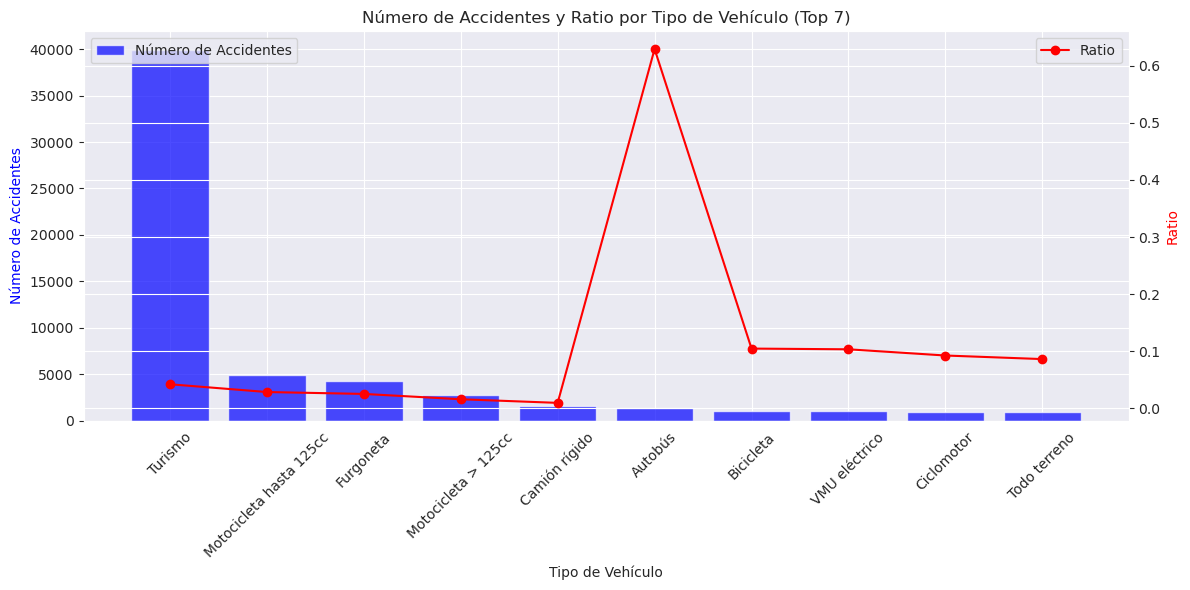

In [61]:
# Sort the DataFrame by 'Número de Accidentes' in descending order and select the top 7
top_10_accidents = df_accidentes_por_tipo_vehiculo.sort_values(by='Número de Accidentes', ascending=False).head(10)

# Extract data for the top 7 categories
ratio_data = top_10_accidents['Ratio']
vehicle_type_data = top_10_accidents['Tipo de Vehículo']
num_accidents_data = top_10_accidents['Número de Accidentes']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the data for 'Número de Accidentes'
ax1.bar(vehicle_type_data, num_accidents_data, label='Número de Accidentes', color='blue', alpha=0.7)

# Set labels and legend for the first y-axis
ax1.set_xlabel('Tipo de Vehículo')
ax1.set_ylabel('Número de Accidentes', color='blue')
ax1.set_title('Número de Accidentes y Ratio por Tipo de Vehículo (Top 7)')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a secondary y-axis for 'Ratio'
ax2 = ax1.twinx()
ax2.plot(vehicle_type_data, ratio_data, marker='o', color='red', label='Ratio', linestyle='-')

# Set labels and legend for the secondary y-axis
ax2.set_ylabel('Ratio', color='red')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

                     Tipo de Vehículo  Número de Accidentes  \
0                             Turismo                 39925   
1             Motocicleta hasta 125cc                  4899   
2                           Furgoneta                  4208   
3                 Motocicleta > 125cc                  2702   
4                       Camión rígido                  1562   
5                             Autobús                  1317   
6                           Bicicleta                  1083   
7                       VMU eléctrico                  1070   
8                          Ciclomotor                   957   
9                        Todo terreno                   892   
10                       Tractocamión                   308   
11  Bicicleta EPAC (pedaleo asistido)                   246   
12                Maquinaria de obras                   232   
13          Otros vehículos con motor                   230   
14                Vehículo articulado                  

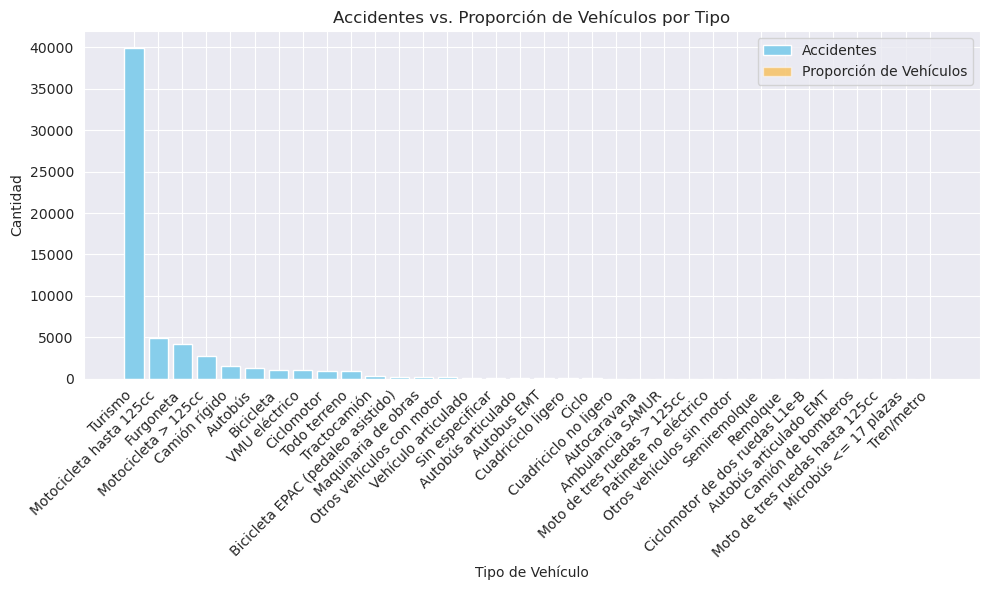

In [20]:
proporciones = {tipo: (cantidad / total_vehicles) for tipo, cantidad in type_vehicles.items()}

df_accidentes_por_tipo_vehiculo = accidentes_por_tipo_vehiculo.reset_index()
df_accidentes_por_tipo_vehiculo.columns = ['Tipo de Vehículo', 'Número de Accidentes']

df_accidentes_por_tipo_vehiculo.sort_values(by='Número de Accidentes', inplace=True, ascending=False)

df_accidentes_por_tipo_vehiculo['Proporción de Vehículos'] = df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'].map(
    proporciones)

print(df_accidentes_por_tipo_vehiculo)

plt.figure(figsize=(10, 6))
plt.bar(df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'], df_accidentes_por_tipo_vehiculo['Número de Accidentes'],
        color='skyblue', label='Accidentes')
plt.bar(df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'],
        df_accidentes_por_tipo_vehiculo['Proporción de Vehículos'] * max(
            df_accidentes_por_tipo_vehiculo['Número de Accidentes']), color='orange', alpha=0.5,
        label='Proporción de Vehículos')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad')
plt.title('Accidentes vs. Proporción de Vehículos por Tipo')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

In [89]:
df_accidentes_por_sexo = df['sexo'].value_counts()
df_accidentes_por_sexo

sexo
1    45752
0    14741
Name: count, dtype: int64

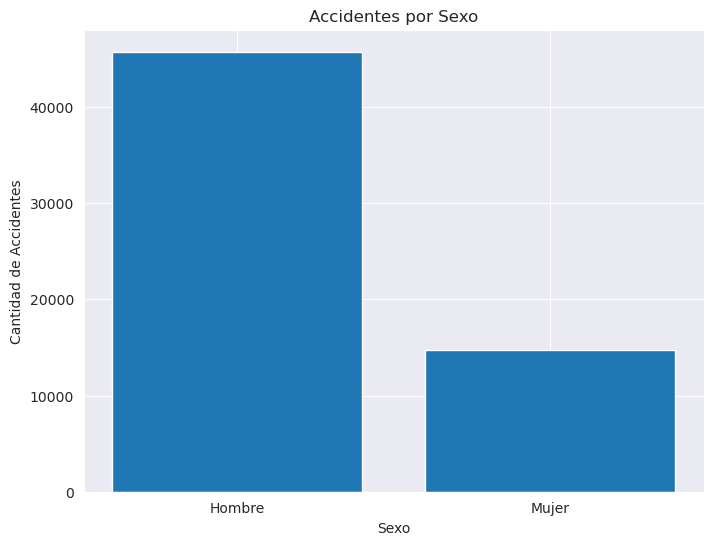

In [90]:
plt.figure(figsize=(8, 6))
plt.bar(['Hombre', 'Mujer'], df_accidentes_por_sexo)
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Sexo')
plt.show()


In [97]:
contingencia_alcohol = pd.crosstab(df['sexo'], df['positiva_alcohol'], dropna=False)
contingencia_alcohol.rename({0: 'Mujer', 1: 'Hombre'}, inplace=True)

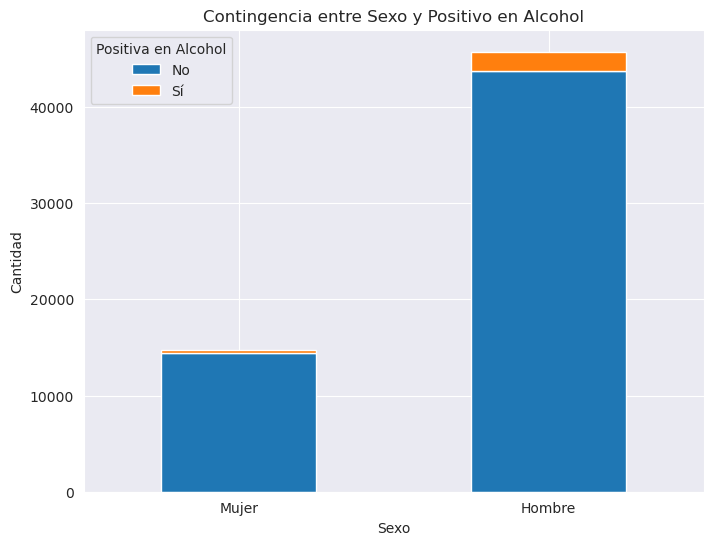

In [101]:
contingencia_alcohol.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.title('Contingencia entre Sexo y Positivo en Alcohol')
plt.legend(title='Positiva en Alcohol', labels=['No', 'Sí'])
plt.show()

Calculamos los porcentajes relativos tanto para hombre como para mujer

In [114]:
df_sexo_alcohol = df.filter(items=['sexo', 'positiva_alcohol'])

In [147]:
numero_accidentes_sexo = np.array(df_sexo_alcohol.groupby(['sexo']).size())
positivos_accidentes_sexo = np.array(df_sexo_alcohol[df_sexo_alcohol['positiva_alcohol'] == 1].groupby(['sexo']).size())

In [148]:
numero_accidentes_sexo

array([14741, 45752])

In [149]:
positivos_accidentes_sexo / numero_accidentes_sexo

array([0.02218303, 0.04395436])

Por lo que concluimos que es el doble de probable que los implicados varones den positivo alcohol que las implicadas mujeres

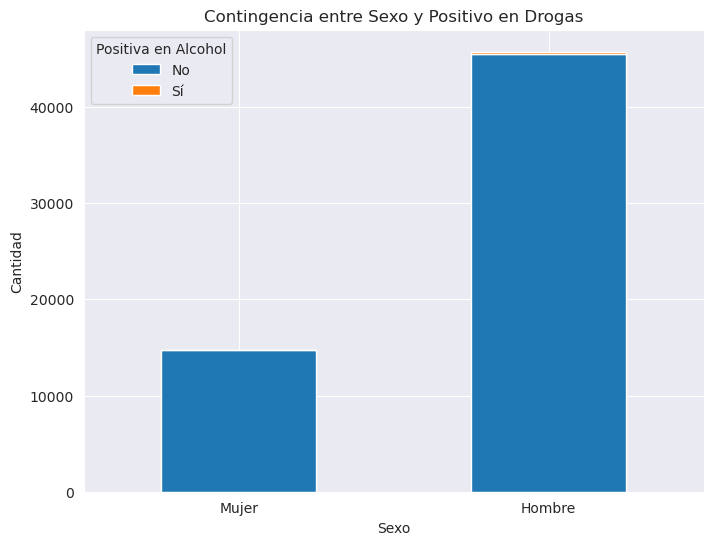

In [21]:
contingencia_alcohol = pd.crosstab(df['sexo'], df['positiva_droga'], dropna=False)
contingencia_alcohol.rename({0: 'Mujer', 1: 'Hombre'}, inplace=True)

contingencia_alcohol.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.title('Contingencia entre Sexo y Positivo en Drogas')
plt.legend(title='Positiva en Alcohol', labels=['No', 'Sí'])
plt.show()

In [152]:
df_sexo_drogas = df.filter(items=['sexo', 'positiva_droga'])
numero_accidentes_sexo = np.array(df_sexo_drogas.groupby(['sexo']).size())
positivos_accidentes_sexo = np.array(df_sexo_drogas[df_sexo_drogas['positiva_droga'] == 1].groupby(['sexo']).size())

positivos_accidentes_sexo / numero_accidentes_sexo

array([0.00156027, 0.00535496])

In [35]:
df_laborable_alcohol = df.filter(items=['bool_laborable', 'positiva_alcohol'])
df_laborable_alcohol[df_laborable_alcohol['positiva_alcohol'] == 1].groupby(
    ['positiva_alcohol', 'bool_laborable']).size()

positiva_alcohol  bool_laborable
1.0               0                 1173
                  1                 1165
dtype: int64

In [36]:
df_laborable_drogas = df.filter(items=['bool_laborable', 'positiva_droga'])
df_laborable_drogas[df_laborable_drogas['positiva_droga'] == 1].groupby(['positiva_droga', 'bool_laborable']).size()

positiva_droga  bool_laborable
1.0             0                  82
                1                 186
dtype: int64

In [43]:
positivos_accidentes_laborable = np.array(df_laborable_alcohol[df_laborable_alcohol['positiva_alcohol'] == 1].groupby(
    ['positiva_alcohol', 'bool_laborable']).size())
proportion = np.array((2, 5))

positivos_accidentes_laborable / proportion

array([586.5, 233. ])

In [47]:
positivos_accidentes_laborable = np.array(df_laborable_drogas[df_laborable_drogas['positiva_droga'] == 1].groupby(
    ['positiva_droga', 'bool_laborable']).size())
proportion = np.array((2, 5))

positivos_accidentes_laborable / proportion

array([41. , 37.2])